In [38]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
prior10mean = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\meanandstd_all_prior10days.csv')
prior10mean

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,10daysbefore
0,0.065500,0.040319,0.047777,0.088074,0.057137,0.064527,0.099775,0.067341,0.074576,0.109629,...,0.119455,0.119649,0.119475,0.156827,0.158234,0.156595,0.204391,0.204151,0.205046,20030924
1,0.065090,0.041987,0.047698,0.087812,0.058913,0.064692,0.099293,0.069061,0.074655,0.109408,...,0.120123,0.119188,0.119864,0.156992,0.157431,0.157313,0.204239,0.204315,0.205720,20030925
2,0.065803,0.042413,0.048639,0.088819,0.059157,0.065641,0.100199,0.069331,0.075397,0.110241,...,0.120555,0.118614,0.119929,0.157346,0.157009,0.157080,0.204004,0.204618,0.205661,20030926
3,0.066565,0.043566,0.049204,0.089660,0.060844,0.066311,0.100654,0.070821,0.075716,0.111002,...,0.120687,0.118178,0.120453,0.158263,0.156395,0.158090,0.205136,0.204491,0.207211,20030929
4,0.067265,0.045141,0.050244,0.090214,0.062627,0.067598,0.101192,0.072785,0.076913,0.111540,...,0.120953,0.118346,0.120348,0.158027,0.156237,0.158197,0.204723,0.204233,0.206786,20030930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,0.094665,0.071794,0.082014,0.107612,0.083723,0.092569,0.112795,0.091633,0.097179,0.115969,...,0.131293,0.127650,0.127268,0.166723,0.163245,0.164055,0.209738,0.208948,0.210879,20201224
4339,0.093450,0.070084,0.074076,0.106965,0.082281,0.084042,0.112266,0.089834,0.088108,0.115961,...,0.130561,0.126952,0.127811,0.166487,0.162287,0.163748,0.209975,0.207441,0.210553,20201228
4340,0.093517,0.068699,0.072995,0.107171,0.080827,0.083377,0.112502,0.088278,0.087348,0.115834,...,0.130529,0.126720,0.127744,0.166512,0.162150,0.163513,0.210114,0.208141,0.209441,20201229
4341,0.092590,0.068586,0.071928,0.106256,0.080961,0.082305,0.111632,0.088144,0.086421,0.114734,...,0.130541,0.125944,0.127559,0.166552,0.161426,0.163631,0.209897,0.207114,0.209333,20201230


In [3]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']

In [4]:
column_mean = prior10mean[columns_to_average].mean(axis=1)
prior10mean_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TE_prior10days': column_mean})
prior10mean_average['Date'] = prior10mean_average['Date'].astype(int)
prior10mean_average

,Date,Average_TE_prior10days
0,20030924,0.076713
1,20030925,0.077156
2,20030926,0.077854
3,20030929,0.078765
4,20030930,0.079933
...,...,...
4338,20201224,0.096704
4339,20201228,0.093145
4340,20201229,0.092619
4341,20201230,0.092025


In [5]:
prior10_density = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\20201231_Stand_sumanddensity.csv')
prior10_density

,DATE_dat,N_Firms,TE_tp_1of3_sr_1sec_standarized_sum,TE_tp_2of3_sr_1sec_standarized_sum,TE_tp_3of3_sr_1sec_standarized_sum,TE_tp_1of3_sr_2sec_standarized_sum,TE_tp_2of3_sr_2sec_standarized_sum,TE_tp_3of3_sr_2sec_standarized_sum,TE_tp_1of3_sr_3sec_standarized_sum,TE_tp_2of3_sr_3sec_standarized_sum,...,TE_tp_3of3_sr_15sec_standarized_density,TE_tp_1of3_sr_30sec_standarized_density,TE_tp_2of3_sr_30sec_standarized_density,TE_tp_3of3_sr_30sec_standarized_density,TE_tp_1of3_sr_1min_standarized_density,TE_tp_2of3_sr_1min_standarized_density,TE_tp_3of3_sr_1min_standarized_density,TE_tp_1of3_sr_2min_standarized_density,TE_tp_2of3_sr_2min_standarized_density,TE_tp_3of3_sr_2min_standarized_density
0,20030924.0,512,-17436.392516,144315.714895,45540.437793,-16267.716672,126987.320217,64716.485609,-13138.797829,112058.304111,...,0.005572,0.073622,0.004708,0.010449,-0.002520,-0.010241,-0.051025,-0.016451,-0.075772,-0.023344
1,20030925.0,512,76948.928033,54102.042245,59920.945461,87330.855022,46952.917955,37158.218113,66558.026801,51287.061996,...,0.114466,0.160480,0.050991,0.070480,0.076976,0.063446,0.062790,0.018439,0.017251,-0.016415
2,20030926.0,511,90315.499949,65618.952800,64999.532442,74603.748689,86338.181283,68414.824005,62860.290005,53896.345636,...,-0.029561,-0.116184,0.044190,-0.008345,-0.139289,0.023616,-0.083273,-0.094824,-0.011063,-0.106327
3,20030929.0,511,42053.615355,55583.895918,43812.379288,44298.108794,60288.122842,37914.171073,38064.466090,49610.247332,...,-0.043629,0.047946,-0.053623,-0.025599,-0.059355,-0.010537,-0.040486,-0.055392,-0.054276,-0.026739
4,20030930.0,511,88839.160062,93104.539653,101720.594862,65155.664646,97482.747900,86036.203692,56769.759106,76864.859662,...,0.094052,-0.118665,-0.007640,0.067928,-0.073321,-0.030009,0.067877,-0.066608,-0.045434,-0.061350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,20201224.0,510,-61775.964816,-82856.928068,-433877.829221,-39488.162992,-64076.123598,-400307.813879,-34758.275653,-75903.222548,...,-0.684010,0.035403,0.046641,-0.352356,-0.013819,0.130808,-0.193569,-0.060244,0.169143,-0.071851
4339,20201228.0,510,-19684.571210,-38238.218547,-25456.449537,-12259.969126,-34442.066720,-4178.304647,-11959.375462,-35539.623783,...,0.106430,0.097526,0.024209,0.097599,0.072948,-0.008752,0.060012,-0.030204,-0.025477,0.020582
4340,20201229.0,510,-22470.091190,9969.030228,13815.778510,-27896.543274,23701.194299,20705.449225,-20161.748957,13723.881494,...,0.062002,-0.025953,0.011832,0.026024,-0.006520,0.024285,-0.012029,-0.032413,-0.014722,-0.039684
4341,20201230.0,510,-46806.373214,-19323.752234,888.442878,-43004.544933,-20476.082307,-850.734652,-29318.250502,-12745.611023,...,0.045417,0.072740,0.004600,0.014161,0.043782,-0.014433,0.036595,-0.045273,-0.052714,0.028926


In [6]:
columns_to_average = ['TE_tp_1of3_sr_1sec_standarized_density','TE_tp_2of3_sr_1sec_standarized_density','TE_tp_3of3_sr_1sec_standarized_density',
                      'TE_tp_1of3_sr_2sec_standarized_density','TE_tp_2of3_sr_2sec_standarized_density','TE_tp_3of3_sr_2sec_standarized_density',
                      'TE_tp_1of3_sr_3sec_standarized_density','TE_tp_2of3_sr_3sec_standarized_density','TE_tp_3of3_sr_3sec_standarized_density',
                      'TE_tp_1of3_sr_5sec_standarized_density','TE_tp_2of3_sr_5sec_standarized_density','TE_tp_3of3_sr_5sec_standarized_density',
                      'TE_tp_1of3_sr_6sec_standarized_density','TE_tp_2of3_sr_6sec_standarized_density','TE_tp_3of3_sr_6sec_standarized_density']
column_mean = prior10_density[columns_to_average].mean(axis = 1)
prior10_density_average = pd.DataFrame({'Date': prior10_density['DATE_dat'], 'Average_standarized_density': column_mean})
prior10_density_average['Date'] = prior10_density_average['Date'].astype(int)
prior10_density_average

,Date,Average_standarized_density
0,20030924,0.171397
1,20030925,0.206927
2,20030926,0.218197
3,20030929,0.141094
4,20030930,0.262545
...,...,...
4338,20201224,-0.621341
4339,20201228,-0.059443
4340,20201229,0.020631
4341,20201230,-0.055955


In [7]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_std = prior10mean[columns_to_average].mean(axis=1)
prior10std_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TEstd_prior10days': column_std})
prior10std_average['Date'] = prior10mean_average['Date'].astype(int)
prior10std_average

,Date,Average_TEstd_prior10days
0,20030924,0.049937
1,20030925,0.050135
2,20030926,0.050227
3,20030929,0.050410
4,20030930,0.050399
...,...,...
4338,20201224,0.067319
4339,20201228,0.068400
4340,20201229,0.068310
4341,20201230,0.068227


In [8]:
everyday_TEmean = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\everyday_mean.csv')
everyday_TEmean

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,Date
0,0.067136,0.041648,0.054333,0.087895,0.059860,0.073248,0.102042,0.071308,0.081050,0.111317,...,0.116594,0.120615,0.119065,0.156132,0.159294,0.154274,0.200726,0.201703,0.199638,20030910
1,0.068807,0.044642,0.045932,0.092845,0.064167,0.061201,0.103197,0.076136,0.074780,0.115302,...,0.118777,0.124539,0.117178,0.153876,0.160529,0.157796,0.206253,0.200039,0.205523,20030911
2,0.071031,0.039272,0.051302,0.093410,0.056443,0.069966,0.107910,0.064671,0.078331,0.111762,...,0.121224,0.121905,0.114579,0.156230,0.159682,0.150922,0.203723,0.205383,0.192542,20030912
3,0.065622,0.034972,0.044452,0.091862,0.052949,0.059591,0.102735,0.060631,0.069385,0.110487,...,0.118511,0.120123,0.123813,0.156597,0.158105,0.157761,0.205982,0.206507,0.207581,20030915
4,0.055858,0.034404,0.054417,0.079547,0.049649,0.068572,0.091482,0.058957,0.080044,0.104648,...,0.121442,0.115441,0.116253,0.158492,0.156339,0.153407,0.201404,0.200957,0.201748,20030916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0.079558,0.056125,0.001234,0.096448,0.068989,0.003982,0.102492,0.072493,0.001778,0.110625,...,0.127741,0.120598,0.127109,0.165240,0.158168,0.158499,0.209668,0.195622,0.207381,20201224
4349,0.088707,0.062951,0.068920,0.103541,0.074456,0.083046,0.108750,0.080944,0.086570,0.110535,...,0.129814,0.127574,0.128440,0.166061,0.165284,0.167928,0.209785,0.216032,0.208120,20201228
4350,0.088126,0.070547,0.075775,0.099421,0.086211,0.088291,0.106592,0.091715,0.095170,0.108356,...,0.130211,0.124058,0.122171,0.165039,0.162769,0.163091,0.204822,0.202666,0.208884,20201229
4351,0.081378,0.065021,0.072105,0.094283,0.076343,0.082105,0.102986,0.084962,0.090584,0.105178,...,0.132563,0.126613,0.125511,0.171242,0.162929,0.168398,0.210846,0.210857,0.214258,20201230


In [9]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEmean_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'Average_TE_today': column_mean})
TEmean_today['Date'] = TEmean_today['Date'].astype(int)
TEmean_today

,Date,Average_TE_today
0,20030910,0.080200
1,20030911,0.080364
2,20030912,0.079152
3,20030915,0.073773
4,20030916,0.073389
...,...,...
4348,20201224,0.057959
4349,20201228,0.089406
4350,20201229,0.093756
4351,20201230,0.088164


In [10]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEstd_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'TE_std_today': column_mean})
TEstd_today['Date'] = TEmean_today['Date'].astype(int)
TEstd_today

,Date,TE_std_today
0,20030910,0.049287
1,20030911,0.050304
2,20030912,0.049561
3,20030915,0.050133
4,20030916,0.049208
...,...,...
4348,20201224,0.059904
4349,20201228,0.067790
4350,20201229,0.068722
4351,20201230,0.066342


In [11]:
features = pd.merge(right = prior10mean_average, left = prior10_density_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = prior10std_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEmean_today, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEstd_today, how = 'inner', on= 'Date')
features

,Date,TE_std_today,Average_TE_today,Average_TEstd_prior10days,Average_standarized_density,Average_TE_prior10days
0,20030924,0.050045,0.084633,0.049937,0.171397,0.076713
1,20030925,0.050368,0.087342,0.050135,0.206927,0.077156
2,20030926,0.050482,0.088300,0.050227,0.218197,0.077854
3,20030929,0.050117,0.085469,0.050410,0.141094,0.078765
4,20030930,0.050216,0.092382,0.050399,0.262545,0.079933
...,...,...,...,...,...,...
4338,20201224,0.059904,0.057959,0.067319,-0.621341,0.096704
4339,20201228,0.067790,0.089406,0.068400,-0.059443,0.093145
4340,20201229,0.068722,0.093756,0.068310,0.020631,0.092619
4341,20201230,0.066342,0.088164,0.068227,-0.055955,0.092025


In [12]:
ff = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\FF_extracted.csv')
ff.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
ff[['Mkt-RF', 'SMB', 'HML', 'RF']] = ff[['Mkt-RF', 'SMB', 'HML', 'RF']]/100
ff = ff[['Date','Mkt-RF','RF']]
ff

,Date,Mkt-RF,RF
0,19260701,0.0010,0.00009
1,19260702,0.0045,0.00009
2,19260706,0.0017,0.00009
3,19260707,0.0009,0.00009
4,19260708,0.0021,0.00009
...,...,...,...
25538,20230725,0.0025,0.00022
25539,20230726,0.0002,0.00022
25540,20230727,-0.0074,0.00022
25541,20230728,0.0114,0.00022


In [13]:
port_10 = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\10_industry_protfolio_extracted.csv')
port_10[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']] = port_10[['NoDur','Durbl','Manuf',
                                                                                                     'Enrgy','HiTec','Telcm','Shops','Hlth ',
                                                                                                     'Utils','Other']]/100
port_10 = pd.merge(ff, port_10, on='Date')
port_10

,Date,Mkt-RF,RF,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,19260701,0.0010,0.00009,0.0002,-0.0028,-0.0023,0.0057,-0.0021,-0.0002,-0.0001,0.0097,0.0061,0.0020
1,19260702,0.0045,0.00009,0.0029,0.0107,0.0081,0.0064,0.0036,0.0026,0.0001,0.0013,0.0047,0.0010
2,19260706,0.0017,0.00009,0.0024,0.0072,0.0022,0.0017,0.0047,0.0017,-0.0023,0.0023,0.0073,-0.0018
3,19260707,0.0009,0.00009,0.0027,0.0006,0.0023,-0.0004,-0.0010,0.0032,-0.0059,0.0033,0.0017,0.0016
4,19260708,0.0021,0.00009,0.0069,0.0005,0.0015,0.0012,0.0035,0.0040,-0.0036,0.0091,-0.0020,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25538,20230725,0.0025,0.00022,-0.0001,-0.0157,0.0029,0.0057,0.0095,-0.0066,0.0006,-0.0019,0.0014,-0.0020
25539,20230726,0.0002,0.00022,0.0033,-0.0005,0.0020,-0.0011,-0.0025,-0.0021,-0.0002,-0.0014,0.0004,0.0056
25540,20230727,-0.0074,0.00022,-0.0087,-0.0244,-0.0028,-0.0055,-0.0045,0.0003,-0.0050,-0.0058,-0.0159,-0.0122
25541,20230728,0.0114,0.00022,0.0092,0.0288,0.0120,0.0030,0.0170,0.0093,0.0124,0.0078,-0.0012,0.0052


In [14]:
port10_ourdates = port_10[(port_10['Date'] >= 20030910) & (port_10['Date'] <= 20201231)]
# columns_to_remove = ['SMB', 'HML', 'RF']
# port10_ourdates = port10_ourdates.drop(columns=columns_to_remove)
port10_ourdates

,Date,Mkt-RF,RF,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
20537,20030910,-0.0137,0.00004,0.0017,-0.0206,-0.0178,-0.0063,-0.0320,-0.0108,-0.0067,0.0000,0.0004,-0.0144
20538,20030911,0.0062,0.00004,0.0051,0.0050,0.0056,-0.0006,0.0118,-0.0020,0.0102,0.0046,-0.0008,0.0062
20539,20030912,0.0023,0.00004,-0.0007,0.0077,0.0044,-0.0034,0.0050,0.0000,0.0008,0.0022,0.0057,0.0021
20540,20030915,-0.0035,0.00004,-0.0033,-0.0024,-0.0026,-0.0060,-0.0067,-0.0108,0.0052,-0.0024,-0.0049,-0.0030
20541,20030916,0.0140,0.00004,0.0035,0.0146,0.0123,0.0047,0.0265,0.0178,0.0103,0.0063,0.0075,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24891,20201224,0.0021,0.00000,0.0030,0.0141,0.0035,-0.0072,0.0038,0.0029,-0.0008,-0.0007,0.0060,0.0025
24892,20201228,0.0046,0.00000,0.0035,-0.0007,-0.0019,-0.0050,0.0079,0.0096,0.0163,-0.0056,0.0026,0.0056
24893,20201229,-0.0040,0.00000,-0.0038,-0.0006,-0.0058,-0.0065,-0.0064,0.0009,0.0006,-0.0004,-0.0019,-0.0031
24894,20201230,0.0027,0.00000,0.0023,0.0308,0.0084,0.0189,-0.0020,0.0000,-0.0037,0.0028,0.0053,0.0062


# Features

In [15]:
prior10mean = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\meanandstd_all_prior10days.csv')
prior10mean.head()

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,10daysbefore
0,0.065500,0.040319,0.047777,0.088074,0.057137,0.064527,0.099775,0.067341,0.074576,0.109629,...,0.119455,0.119649,0.119475,0.156827,0.158234,0.156595,0.204391,0.204151,0.205046,20030924
1,0.065090,0.041987,0.047698,0.087812,0.058913,0.064692,0.099293,0.069061,0.074655,0.109408,...,0.120123,0.119188,0.119864,0.156992,0.157431,0.157313,0.204239,0.204315,0.205720,20030925
2,0.065803,0.042413,0.048639,0.088819,0.059157,0.065641,0.100199,0.069331,0.075397,0.110241,...,0.120555,0.118614,0.119929,0.157346,0.157009,0.157080,0.204004,0.204618,0.205661,20030926
3,0.066565,0.043566,0.049204,0.089660,0.060844,0.066311,0.100654,0.070821,0.075716,0.111002,...,0.120687,0.118178,0.120453,0.158263,0.156395,0.158090,0.205136,0.204491,0.207211,20030929
4,0.067265,0.045141,0.050244,0.090214,0.062627,0.067598,0.101192,0.072785,0.076913,0.111540,...,0.120953,0.118346,0.120348,0.158027,0.156237,0.158197,0.204723,0.204233,0.206786,20030930


In [16]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']
column_mean = prior10mean[columns_to_average].mean(axis=1)
prior10mean_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TE_prior10days': column_mean})
prior10mean_average['Date'] = prior10mean_average['Date'].astype(int)
prior10mean_average.head()

,Date,Average_TE_prior10days
0,20030924,0.076713
1,20030925,0.077156
2,20030926,0.077854
3,20030929,0.078765
4,20030930,0.079933


In [17]:
prior10_density = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\20201231_Stand_sumanddensity.csv')
prior10_density.head()

,DATE_dat,N_Firms,TE_tp_1of3_sr_1sec_standarized_sum,TE_tp_2of3_sr_1sec_standarized_sum,TE_tp_3of3_sr_1sec_standarized_sum,TE_tp_1of3_sr_2sec_standarized_sum,TE_tp_2of3_sr_2sec_standarized_sum,TE_tp_3of3_sr_2sec_standarized_sum,TE_tp_1of3_sr_3sec_standarized_sum,TE_tp_2of3_sr_3sec_standarized_sum,...,TE_tp_3of3_sr_15sec_standarized_density,TE_tp_1of3_sr_30sec_standarized_density,TE_tp_2of3_sr_30sec_standarized_density,TE_tp_3of3_sr_30sec_standarized_density,TE_tp_1of3_sr_1min_standarized_density,TE_tp_2of3_sr_1min_standarized_density,TE_tp_3of3_sr_1min_standarized_density,TE_tp_1of3_sr_2min_standarized_density,TE_tp_2of3_sr_2min_standarized_density,TE_tp_3of3_sr_2min_standarized_density
0,20030924.0,512,-17436.392516,144315.714895,45540.437793,-16267.716672,126987.320217,64716.485609,-13138.797829,112058.304111,...,0.005572,0.073622,0.004708,0.010449,-0.002520,-0.010241,-0.051025,-0.016451,-0.075772,-0.023344
1,20030925.0,512,76948.928033,54102.042245,59920.945461,87330.855022,46952.917955,37158.218113,66558.026801,51287.061996,...,0.114466,0.160480,0.050991,0.070480,0.076976,0.063446,0.062790,0.018439,0.017251,-0.016415
2,20030926.0,511,90315.499949,65618.952800,64999.532442,74603.748689,86338.181283,68414.824005,62860.290005,53896.345636,...,-0.029561,-0.116184,0.044190,-0.008345,-0.139289,0.023616,-0.083273,-0.094824,-0.011063,-0.106327
3,20030929.0,511,42053.615355,55583.895918,43812.379288,44298.108794,60288.122842,37914.171073,38064.466090,49610.247332,...,-0.043629,0.047946,-0.053623,-0.025599,-0.059355,-0.010537,-0.040486,-0.055392,-0.054276,-0.026739
4,20030930.0,511,88839.160062,93104.539653,101720.594862,65155.664646,97482.747900,86036.203692,56769.759106,76864.859662,...,0.094052,-0.118665,-0.007640,0.067928,-0.073321,-0.030009,0.067877,-0.066608,-0.045434,-0.061350


In [18]:
columns_to_average = ['TE_tp_1of3_sr_1sec_standarized_density','TE_tp_2of3_sr_1sec_standarized_density','TE_tp_3of3_sr_1sec_standarized_density',
                      'TE_tp_1of3_sr_2sec_standarized_density','TE_tp_2of3_sr_2sec_standarized_density','TE_tp_3of3_sr_2sec_standarized_density',
                      'TE_tp_1of3_sr_3sec_standarized_density','TE_tp_2of3_sr_3sec_standarized_density','TE_tp_3of3_sr_3sec_standarized_density',
                      'TE_tp_1of3_sr_5sec_standarized_density','TE_tp_2of3_sr_5sec_standarized_density','TE_tp_3of3_sr_5sec_standarized_density',
                      'TE_tp_1of3_sr_6sec_standarized_density','TE_tp_2of3_sr_6sec_standarized_density','TE_tp_3of3_sr_6sec_standarized_density']
column_mean = prior10_density[columns_to_average].mean(axis = 1)
prior10_density_average = pd.DataFrame({'Date': prior10_density['DATE_dat'], 'Average_standarized_density': column_mean})
prior10_density_average['Date'] = prior10_density_average['Date'].astype(int)
prior10_density_average.head()

,Date,Average_standarized_density
0,20030924,0.171397
1,20030925,0.206927
2,20030926,0.218197
3,20030929,0.141094
4,20030930,0.262545


In [19]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_std = prior10mean[columns_to_average].mean(axis=1)
prior10std_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TEstd_prior10days': column_std})
prior10std_average['Date'] = prior10mean_average['Date'].astype(int)
prior10std_average.head()

,Date,Average_TEstd_prior10days
0,20030924,0.049937
1,20030925,0.050135
2,20030926,0.050227
3,20030929,0.050410
4,20030930,0.050399


In [20]:
everyday_TEmean = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\everyday_mean.csv')
everyday_TEmean.head()

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,Date
0,0.067136,0.041648,0.054333,0.087895,0.059860,0.073248,0.102042,0.071308,0.081050,0.111317,...,0.116594,0.120615,0.119065,0.156132,0.159294,0.154274,0.200726,0.201703,0.199638,20030910
1,0.068807,0.044642,0.045932,0.092845,0.064167,0.061201,0.103197,0.076136,0.074780,0.115302,...,0.118777,0.124539,0.117178,0.153876,0.160529,0.157796,0.206253,0.200039,0.205523,20030911
2,0.071031,0.039272,0.051302,0.093410,0.056443,0.069966,0.107910,0.064671,0.078331,0.111762,...,0.121224,0.121905,0.114579,0.156230,0.159682,0.150922,0.203723,0.205383,0.192542,20030912
3,0.065622,0.034972,0.044452,0.091862,0.052949,0.059591,0.102735,0.060631,0.069385,0.110487,...,0.118511,0.120123,0.123813,0.156597,0.158105,0.157761,0.205982,0.206507,0.207581,20030915
4,0.055858,0.034404,0.054417,0.079547,0.049649,0.068572,0.091482,0.058957,0.080044,0.104648,...,0.121442,0.115441,0.116253,0.158492,0.156339,0.153407,0.201404,0.200957,0.201748,20030916


In [21]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEmean_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'Average_TE_today': column_mean})
TEmean_today['Date'] = TEmean_today['Date'].astype(int)
TEmean_today.head()

,Date,Average_TE_today
0,20030910,0.080200
1,20030911,0.080364
2,20030912,0.079152
3,20030915,0.073773
4,20030916,0.073389


In [22]:
TEmean_today['TE_difference'] = TEmean_today['Average_TE_today'].diff()
TEmean_today

,Date,Average_TE_today,TE_difference
0,20030910,0.080200,NaN
1,20030911,0.080364,0.000163
2,20030912,0.079152,-0.001212
3,20030915,0.073773,-0.005379
4,20030916,0.073389,-0.000384
...,...,...,...
4348,20201224,0.057959,-0.034802
4349,20201228,0.089406,0.031447
4350,20201229,0.093756,0.004350
4351,20201230,0.088164,-0.005592


In [23]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEstd_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'TE_std_today': column_mean})
TEstd_today['Date'] = TEmean_today['Date'].astype(int)
TEstd_today.head()

,Date,TE_std_today
0,20030910,0.049287
1,20030911,0.050304
2,20030912,0.049561
3,20030915,0.050133
4,20030916,0.049208


In [24]:
features = pd.merge(right = prior10mean_average, left = prior10_density_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = prior10std_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEmean_today, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEstd_today, how = 'inner', on= 'Date')
features

,Date,TE_std_today,Average_TE_today,TE_difference,Average_TEstd_prior10days,Average_standarized_density,Average_TE_prior10days
0,20030924,0.050045,0.084633,0.009698,0.049937,0.171397,0.076713
1,20030925,0.050368,0.087342,0.002708,0.050135,0.206927,0.077156
2,20030926,0.050482,0.088300,0.000958,0.050227,0.218197,0.077854
3,20030929,0.050117,0.085469,-0.002831,0.050410,0.141094,0.078765
4,20030930,0.050216,0.092382,0.006914,0.050399,0.262545,0.079933
...,...,...,...,...,...,...,...
4338,20201224,0.059904,0.057959,-0.034802,0.067319,-0.621341,0.096704
4339,20201228,0.067790,0.089406,0.031447,0.068400,-0.059443,0.093145
4340,20201229,0.068722,0.093756,0.004350,0.068310,0.020631,0.092619
4341,20201230,0.066342,0.088164,-0.005592,0.068227,-0.055955,0.092025


In [25]:
features_columns = ['TE_std_today','Average_TE_today', 'TE_difference', 'Average_TEstd_prior10days','Average_standarized_density','Average_TE_prior10days']
for i in features_columns:
    temp = i + '_norm'
    features[temp] = (features[i] - features[i].min()) / (features[i].max() - features[i].min()) # normalization
features = features[['Date','TE_std_today_norm','Average_TE_today_norm', 
                     'TE_difference_norm', 'Average_TEstd_prior10days_norm','Average_standarized_density_norm','Average_TE_prior10days_norm']]
features

,Date,TE_std_today_norm,Average_TE_today_norm,TE_difference_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm
0,20030924,0.024665,0.396617,0.651936,0.007004,0.550126,0.243044
1,20030925,0.030001,0.421477,0.568785,0.012742,0.570775,0.248736
2,20030926,0.031879,0.430271,0.547963,0.015431,0.577325,0.257695
3,20030929,0.025864,0.404285,0.502889,0.020764,0.532515,0.269392
4,20030930,0.027491,0.467743,0.618807,0.020432,0.603098,0.284387
...,...,...,...,...,...,...,...
4338,20201224,0.187274,0.151779,0.122577,0.512573,0.089414,0.499708
4339,20201228,0.317320,0.440427,0.910651,0.543996,0.415970,0.454013
4340,20201229,0.332700,0.480357,0.588316,0.541396,0.462506,0.447261
4341,20201230,0.293440,0.429027,0.470044,0.538983,0.417997,0.439634


# Target Merged

In [26]:
target_features_merged = pd.merge(right = features, left = port10_ourdates, how = 'inner', on = 'Date')
target_features_merged

,Date,Mkt-RF,RF,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,TE_std_today_norm,Average_TE_today_norm,TE_difference_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm
0,20030924,-0.0188,0.00004,-0.0078,-0.0185,-0.0157,0.0012,-0.0331,-0.0260,-0.0166,-0.0196,-0.0085,-0.0162,0.024665,0.396617,0.651936,0.007004,0.550126,0.243044
1,20030925,-0.0081,0.00004,-0.0016,-0.0087,-0.0102,-0.0040,-0.0124,-0.0038,-0.0051,-0.0103,-0.0013,-0.0080,0.030001,0.421477,0.568785,0.012742,0.570775,0.248736
2,20030926,-0.0084,0.00004,-0.0074,-0.0106,-0.0059,-0.0103,-0.0113,-0.0084,-0.0091,-0.0087,0.0060,-0.0081,0.031879,0.430271,0.547963,0.015431,0.577325,0.257695
3,20030929,0.0098,0.00004,0.0044,0.0040,0.0113,0.0060,0.0185,0.0064,0.0014,0.0075,0.0112,0.0103,0.025864,0.404285,0.502889,0.020764,0.532515,0.269392
4,20030930,-0.0096,0.00004,-0.0034,-0.0091,-0.0091,-0.0027,-0.0240,-0.0019,-0.0103,-0.0037,-0.0058,-0.0074,0.027491,0.467743,0.618807,0.020432,0.603098,0.284387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,20201224,0.0021,0.00000,0.0030,0.0141,0.0035,-0.0072,0.0038,0.0029,-0.0008,-0.0007,0.0060,0.0025,0.187274,0.151779,0.122577,0.512573,0.089414,0.499708
4339,20201228,0.0046,0.00000,0.0035,-0.0007,-0.0019,-0.0050,0.0079,0.0096,0.0163,-0.0056,0.0026,0.0056,0.317320,0.440427,0.910651,0.543996,0.415970,0.454013
4340,20201229,-0.0040,0.00000,-0.0038,-0.0006,-0.0058,-0.0065,-0.0064,0.0009,0.0006,-0.0004,-0.0019,-0.0031,0.332700,0.480357,0.588316,0.541396,0.462506,0.447261
4341,20201230,0.0027,0.00000,0.0023,0.0308,0.0084,0.0189,-0.0020,0.0000,-0.0037,0.0028,0.0053,0.0062,0.293440,0.429027,0.470044,0.538983,0.417997,0.439634


# Classification

In [27]:
import copy
feature_target_merged_class = copy.deepcopy(target_features_merged)

target = ['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth ', 'Utils', 'Other']
for i in target:
    temp = i + '_quartile'
    feature_target_merged_class[temp] =  pd.qcut(feature_target_merged_class[i], 4, labels=False, duplicates='raise') + 1
feature_target_merged_class

,Date,Mkt-RF,RF,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,...,NoDur_quartile,Durbl_quartile,Manuf_quartile,Enrgy_quartile,HiTec_quartile,Telcm_quartile,Shops_quartile,Hlth _quartile,Utils_quartile,Other_quartile
0,20030924,-0.0188,0.00004,-0.0078,-0.0185,-0.0157,0.0012,-0.0331,-0.0260,-0.0166,...,1,1,1,3,1,1,1,1,1,1
1,20030925,-0.0081,0.00004,-0.0016,-0.0087,-0.0102,-0.0040,-0.0124,-0.0038,-0.0051,...,2,1,1,2,1,2,1,1,2,1
2,20030926,-0.0084,0.00004,-0.0074,-0.0106,-0.0059,-0.0103,-0.0113,-0.0084,-0.0091,...,1,1,1,1,1,1,1,1,3,1
3,20030929,0.0098,0.00004,0.0044,0.0040,0.0113,0.0060,0.0185,0.0064,0.0014,...,3,3,4,3,4,4,3,4,4,4
4,20030930,-0.0096,0.00004,-0.0034,-0.0091,-0.0091,-0.0027,-0.0240,-0.0019,-0.0103,...,2,1,1,2,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,20201224,0.0021,0.00000,0.0030,0.0141,0.0035,-0.0072,0.0038,0.0029,-0.0008,...,3,4,3,2,3,3,2,2,3,3
4339,20201228,0.0046,0.00000,0.0035,-0.0007,-0.0019,-0.0050,0.0079,0.0096,0.0163,...,3,2,2,2,4,4,4,1,3,3
4340,20201229,-0.0040,0.00000,-0.0038,-0.0006,-0.0058,-0.0065,-0.0064,0.0009,0.0006,...,1,2,1,2,1,3,2,2,2,2
4341,20201230,0.0027,0.00000,0.0023,0.0308,0.0084,0.0189,-0.0020,0.0000,-0.0037,...,3,4,4,4,2,2,2,3,3,3


# EDA

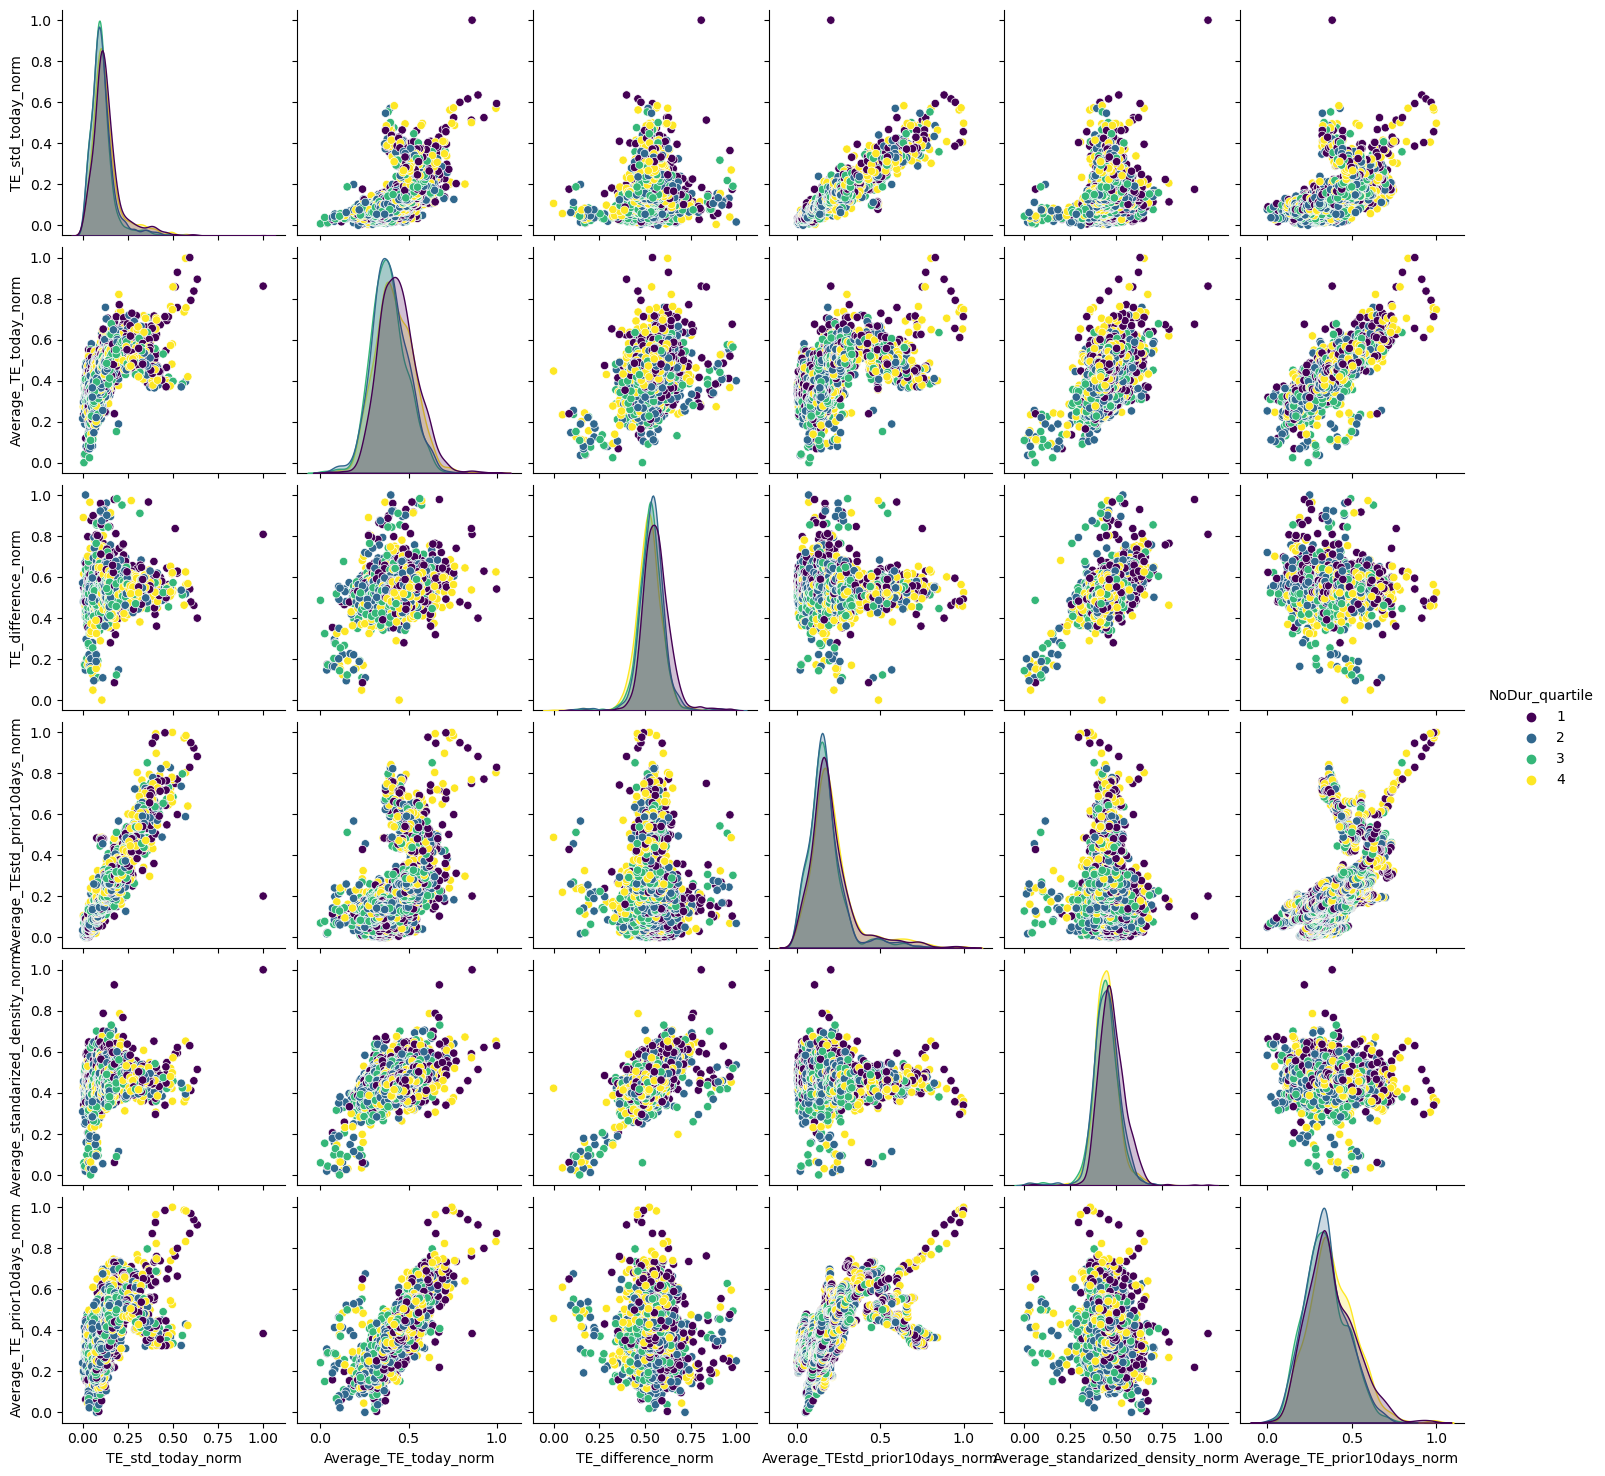

In [28]:
columns_for_pairplot = ['TE_std_today_norm','Average_TE_today_norm', 'TE_difference_norm', 'Average_TEstd_prior10days_norm',
                        'Average_standarized_density_norm','Average_TE_prior10days_norm']
columns_for_pairplot_with_color = columns_for_pairplot + ['NoDur_quartile']
sns.pairplot(feature_target_merged_class[columns_for_pairplot_with_color], hue='NoDur_quartile', palette='viridis')
plt.show()

# Classification 

## KNN

NoDur_quartile
Accuracy:  0.2693990329265485


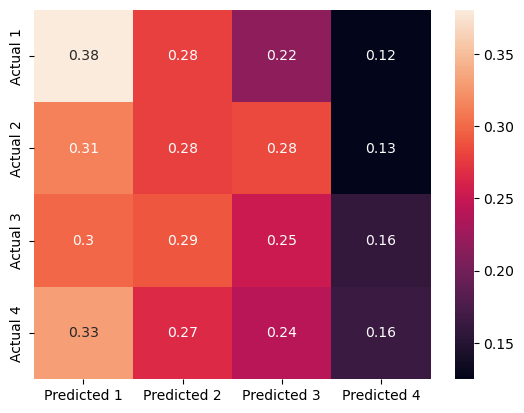

Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.38      0.33      1098
           2       0.25      0.28      0.27      1103
           3       0.25      0.25      0.25      1063
           4       0.29      0.16      0.21      1079

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.26      4343
weighted avg       0.27      0.27      0.26      4343

Durbl_quartile
Accuracy:  0.26962928851024637


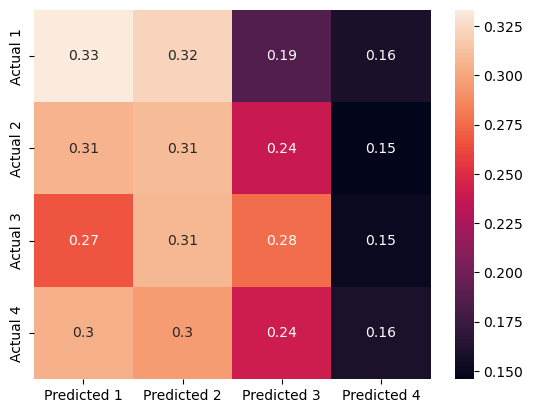

Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.33      0.30      1089
           2       0.25      0.31      0.28      1091
           3       0.29      0.28      0.28      1078
           4       0.26      0.16      0.20      1085

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.27      4343
weighted avg       0.27      0.27      0.27      4343

Manuf_quartile
Accuracy:  0.25903753166014276


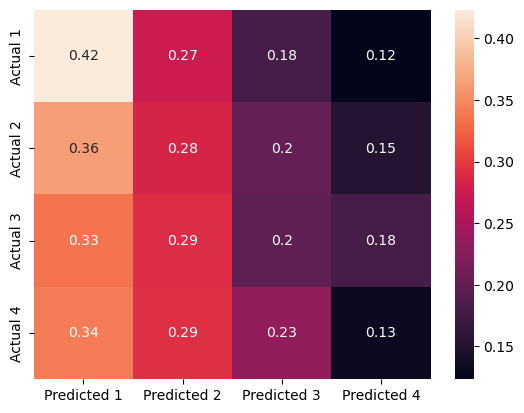

Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.42      0.35      1094
           2       0.25      0.28      0.27      1092
           3       0.24      0.20      0.22      1075
           4       0.22      0.13      0.17      1082

    accuracy                           0.26      4343
   macro avg       0.25      0.26      0.25      4343
weighted avg       0.25      0.26      0.25      4343

Enrgy_quartile
Accuracy:  0.2613400874971218


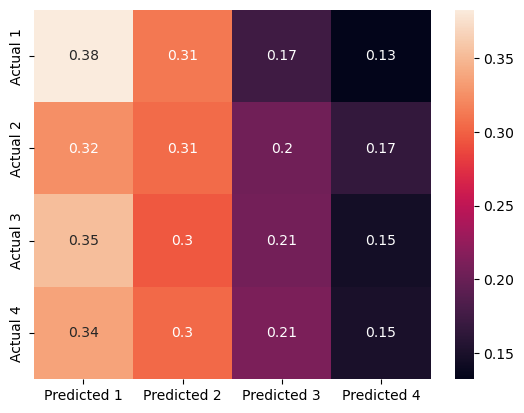

Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.38      0.32      1091
           2       0.25      0.31      0.28      1093
           3       0.26      0.21      0.23      1073
           4       0.25      0.15      0.19      1086

    accuracy                           0.26      4343
   macro avg       0.26      0.26      0.25      4343
weighted avg       0.26      0.26      0.25      4343

HiTec_quartile
Accuracy:  0.2576559981579553


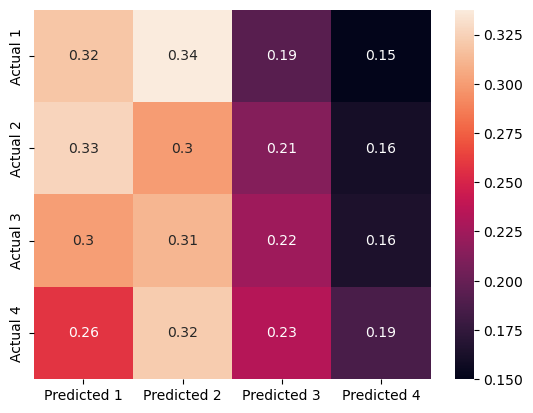

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.32      0.29      1087
           2       0.24      0.30      0.27      1100
           3       0.26      0.22      0.24      1078
           4       0.28      0.19      0.22      1078

    accuracy                           0.26      4343
   macro avg       0.26      0.26      0.25      4343
weighted avg       0.26      0.26      0.25      4343

Telcm_quartile
Accuracy:  0.2717015887635275


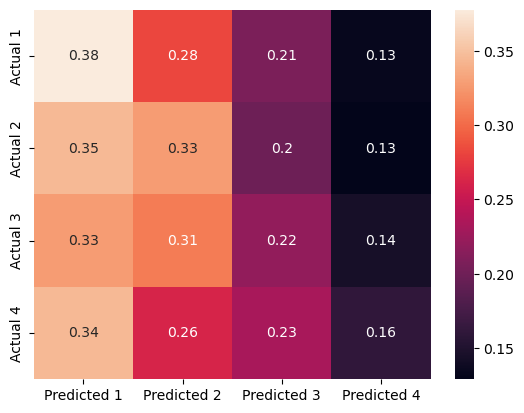

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.38      0.32      1096
           2       0.28      0.33      0.30      1078
           3       0.26      0.22      0.24      1093
           4       0.28      0.16      0.20      1076

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.26      4343
weighted avg       0.27      0.27      0.26      4343

Shops_quartile
Accuracy:  0.2562744646557679


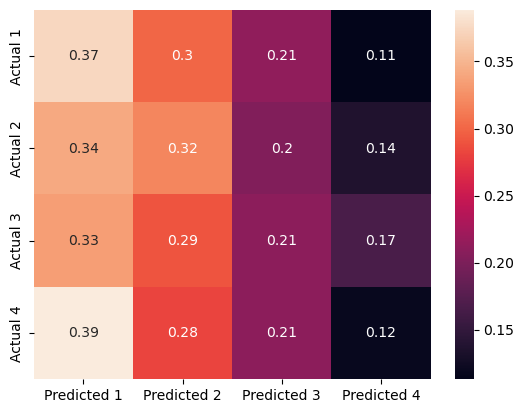

Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.37      0.31      1089
           2       0.27      0.32      0.29      1097
           3       0.25      0.21      0.23      1084
           4       0.22      0.12      0.15      1073

    accuracy                           0.26      4343
   macro avg       0.25      0.26      0.25      4343
weighted avg       0.25      0.26      0.25      4343

Hlth _quartile
Accuracy:  0.2735436334331108


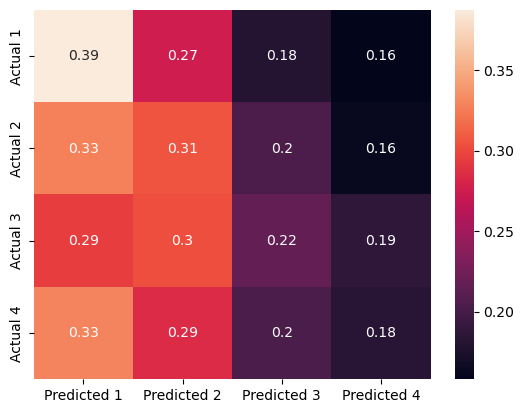

Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.39      0.33      1089
           2       0.26      0.31      0.28      1100
           3       0.27      0.22      0.24      1077
           4       0.26      0.18      0.22      1077

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.27      4343
weighted avg       0.27      0.27      0.27      4343

Utils_quartile
Accuracy:  0.26870826617545474


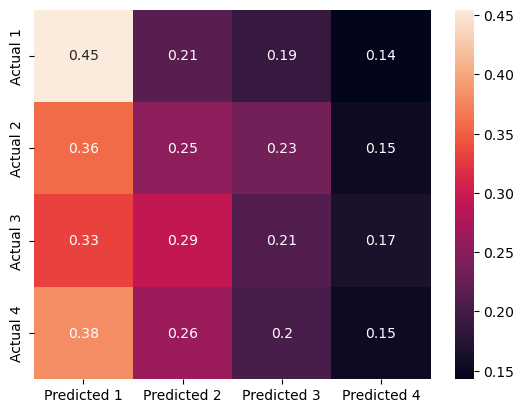

Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.45      0.36      1100
           2       0.25      0.25      0.25      1083
           3       0.25      0.21      0.23      1074
           4       0.25      0.15      0.19      1086

    accuracy                           0.27      4343
   macro avg       0.26      0.27      0.26      4343
weighted avg       0.26      0.27      0.26      4343

Other_quartile
Accuracy:  0.26502417683628826


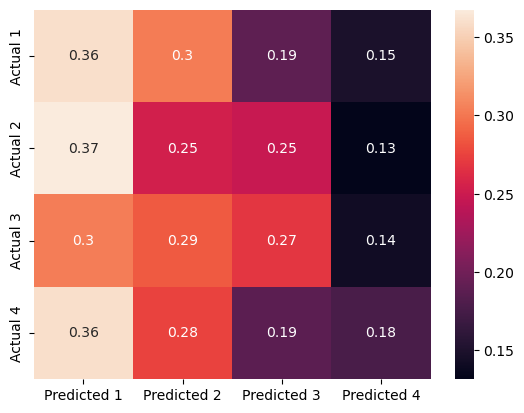

Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.36      0.30      1089
           2       0.23      0.25      0.24      1102
           3       0.30      0.27      0.28      1069
           4       0.29      0.18      0.22      1083

    accuracy                           0.27      4343
   macro avg       0.27      0.26      0.26      4343
weighted avg       0.27      0.27      0.26      4343



In [29]:
X = feature_target_merged_class[['TE_std_today_norm','Average_TE_today_norm', 'TE_difference_norm', 'Average_TEstd_prior10days_norm',
                        'Average_standarized_density_norm','Average_TE_prior10days_norm']]
Y = feature_target_merged_class[['NoDur_quartile','Durbl_quartile','Manuf_quartile','Enrgy_quartile','HiTec_quartile','Telcm_quartile',
                                 'Shops_quartile','Hlth _quartile','Utils_quartile','Other_quartile']]

knn = KNeighborsClassifier(n_neighbors=5)

for i in Y:
    print(i)
    Y_pred_cv = cross_val_predict(knn, X, feature_target_merged_class[i], cv=5)    
    confusion_matrix = pd.crosstab(feature_target_merged_class[i], Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
    cm_np = confusion_matrix.to_numpy()
    cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
          yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
    print('Accuracy: ',metrics.accuracy_score(feature_target_merged_class[i], Y_pred_cv))
    plt.show()
    classification_rep = classification_report(feature_target_merged_class[i], Y_pred_cv)
    print(f'Classification Report:\n{classification_rep}')




## Random Forest

NoDur_quartile
Accuracy:  0.2769974671885793


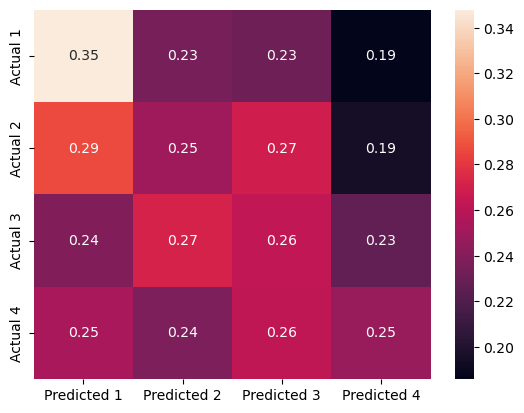

Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.35      0.33      1098
           2       0.26      0.25      0.25      1103
           3       0.25      0.26      0.26      1063
           4       0.29      0.25      0.27      1079

    accuracy                           0.28      4343
   macro avg       0.28      0.28      0.28      4343
weighted avg       0.28      0.28      0.28      4343

Durbl_quartile
Accuracy:  0.2719318443472254


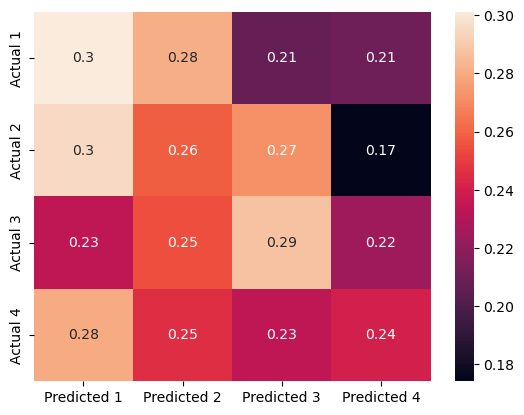

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.30      0.29      1089
           2       0.25      0.26      0.25      1091
           3       0.29      0.29      0.29      1078
           4       0.28      0.24      0.26      1085

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.27      4343
weighted avg       0.27      0.27      0.27      4343

Manuf_quartile
Accuracy:  0.27860925627446465


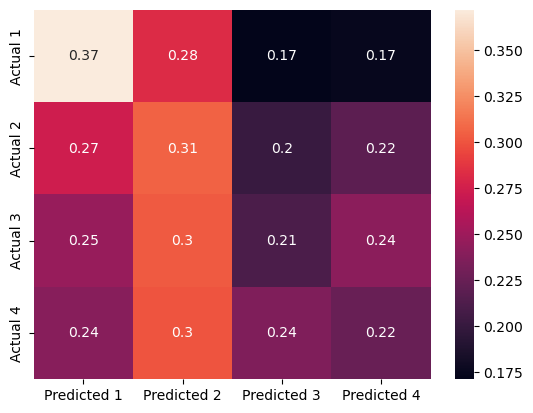

Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.37      0.35      1094
           2       0.26      0.31      0.28      1092
           3       0.25      0.21      0.23      1075
           4       0.26      0.22      0.24      1082

    accuracy                           0.28      4343
   macro avg       0.28      0.28      0.28      4343
weighted avg       0.28      0.28      0.28      4343

Enrgy_quartile
Accuracy:  0.26732673267326734


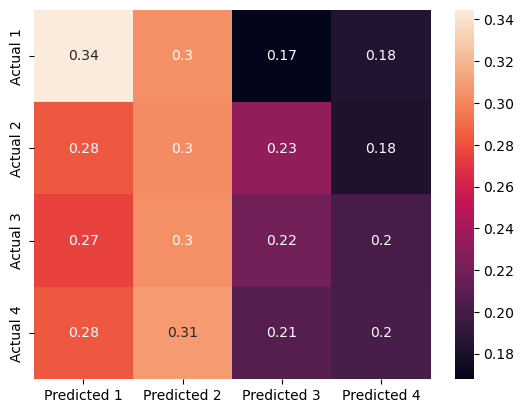

Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.34      0.32      1091
           2       0.25      0.30      0.27      1093
           3       0.26      0.22      0.24      1073
           4       0.26      0.20      0.23      1086

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.26      4343
weighted avg       0.27      0.27      0.26      4343

HiTec_quartile
Accuracy:  0.2629518765830071


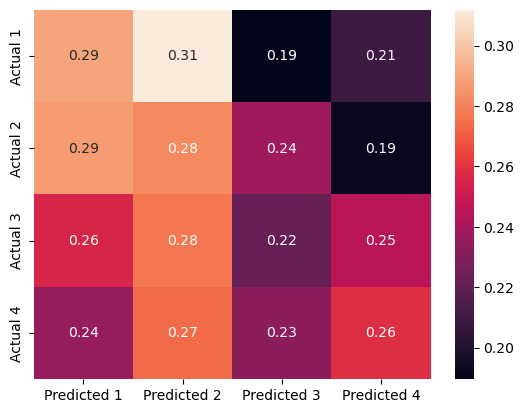

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.29      0.28      1087
           2       0.25      0.28      0.26      1100
           3       0.25      0.22      0.23      1078
           4       0.28      0.26      0.27      1078

    accuracy                           0.26      4343
   macro avg       0.26      0.26      0.26      4343
weighted avg       0.26      0.26      0.26      4343

Telcm_quartile
Accuracy:  0.2864379461201934


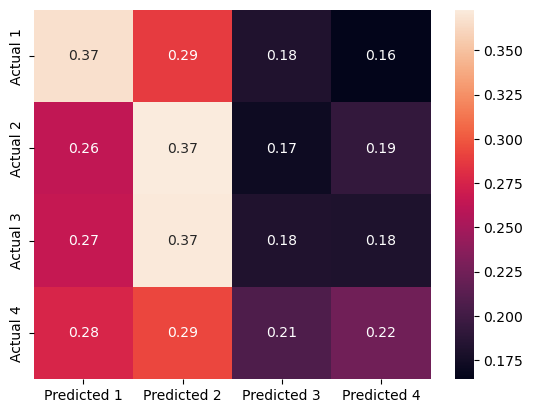

Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.37      0.34      1096
           2       0.28      0.37      0.32      1078
           3       0.25      0.18      0.21      1093
           4       0.29      0.22      0.25      1076

    accuracy                           0.29      4343
   macro avg       0.28      0.29      0.28      4343
weighted avg       0.28      0.29      0.28      4343

Shops_quartile
Accuracy:  0.26087957632972597


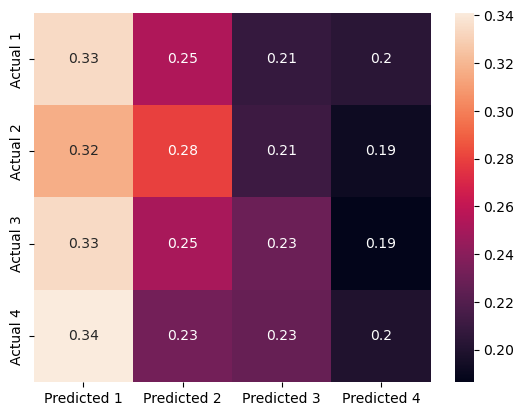

Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.33      0.29      1089
           2       0.28      0.28      0.28      1097
           3       0.26      0.23      0.24      1084
           4       0.25      0.20      0.22      1073

    accuracy                           0.26      4343
   macro avg       0.26      0.26      0.26      4343
weighted avg       0.26      0.26      0.26      4343

Hlth _quartile
Accuracy:  0.2811420676951416


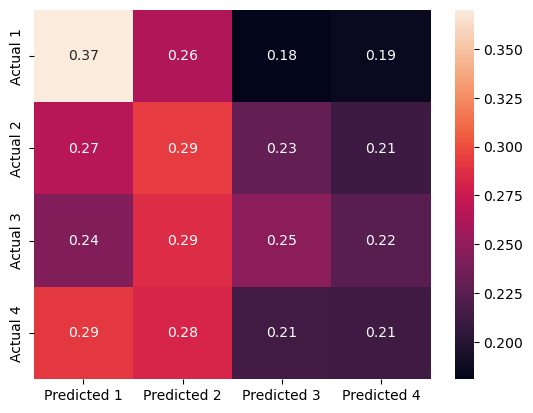

Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.37      0.34      1089
           2       0.26      0.29      0.28      1100
           3       0.28      0.25      0.26      1077
           4       0.25      0.21      0.23      1077

    accuracy                           0.28      4343
   macro avg       0.28      0.28      0.28      4343
weighted avg       0.28      0.28      0.28      4343

Utils_quartile
Accuracy:  0.2654846880036841


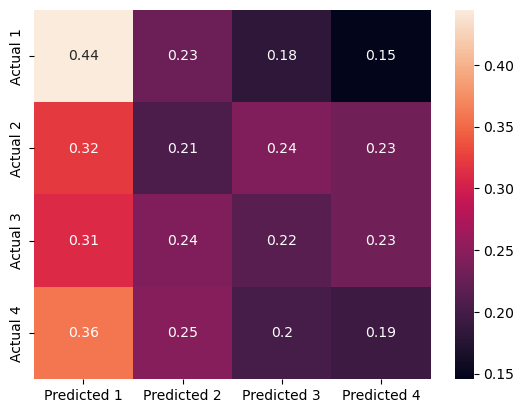

Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.44      0.37      1100
           2       0.22      0.21      0.21      1083
           3       0.25      0.22      0.23      1074
           4       0.24      0.19      0.21      1086

    accuracy                           0.27      4343
   macro avg       0.26      0.26      0.26      4343
weighted avg       0.26      0.27      0.26      4343

Other_quartile
Accuracy:  0.27446465576790235


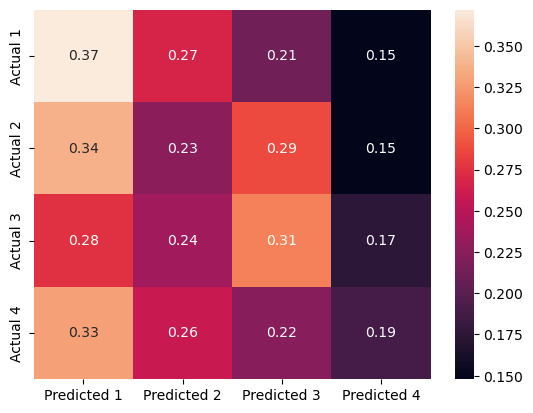

Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.37      0.32      1089
           2       0.23      0.23      0.23      1102
           3       0.30      0.31      0.30      1069
           4       0.29      0.19      0.23      1083

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.27      4343
weighted avg       0.27      0.27      0.27      4343



In [30]:
clf = RandomForestClassifier(n_estimators=10)

for i in Y:
    print(i)
    Y_pred_cv = cross_val_predict(clf, X, feature_target_merged_class[i], cv=5)    
    confusion_matrix = pd.crosstab(feature_target_merged_class[i], Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
    cm_np = confusion_matrix.to_numpy()
    cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
          yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
    print('Accuracy: ',metrics.accuracy_score(feature_target_merged_class[i], Y_pred_cv))
    plt.show()
    classification_rep = classification_report(feature_target_merged_class[i], Y_pred_cv)
    print(f'Classification Report:\n{classification_rep}')

## logistic Regression

NoDur_quartile
Accuracy:  0.3248906285977435


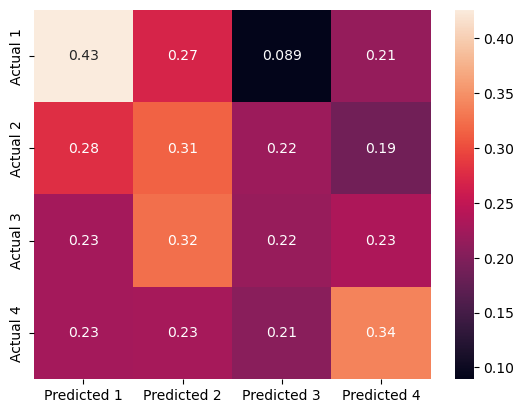

Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.43      0.40      1098
           2       0.28      0.31      0.30      1103
           3       0.29      0.22      0.25      1063
           4       0.35      0.34      0.34      1079

    accuracy                           0.32      4343
   macro avg       0.32      0.32      0.32      4343
weighted avg       0.32      0.32      0.32      4343

Durbl_quartile
Accuracy:  0.3159106608335252


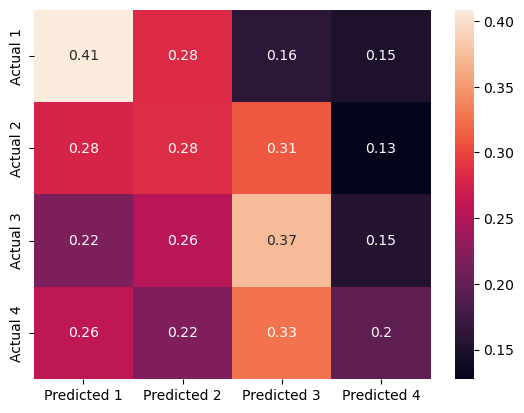

Classification Report:
              precision    recall  f1-score   support

           1       0.35      0.41      0.38      1089
           2       0.27      0.28      0.28      1091
           3       0.32      0.37      0.34      1078
           4       0.31      0.20      0.24      1085

    accuracy                           0.32      4343
   macro avg       0.31      0.32      0.31      4343
weighted avg       0.31      0.32      0.31      4343

Manuf_quartile
Accuracy:  0.3294957402717016


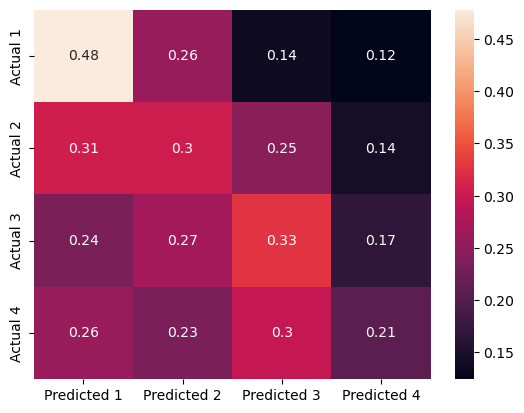

Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.48      0.42      1094
           2       0.29      0.30      0.29      1092
           3       0.32      0.33      0.32      1075
           4       0.32      0.21      0.25      1082

    accuracy                           0.33      4343
   macro avg       0.33      0.33      0.32      4343
weighted avg       0.33      0.33      0.32      4343

Enrgy_quartile
Accuracy:  0.3099240156573797


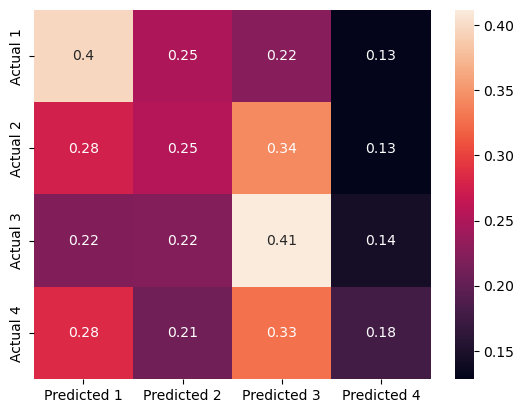

Classification Report:
              precision    recall  f1-score   support

           1       0.34      0.40      0.37      1091
           2       0.27      0.25      0.26      1093
           3       0.31      0.41      0.36      1073
           4       0.31      0.18      0.23      1086

    accuracy                           0.31      4343
   macro avg       0.31      0.31      0.30      4343
weighted avg       0.31      0.31      0.30      4343

HiTec_quartile
Accuracy:  0.3154501496661294


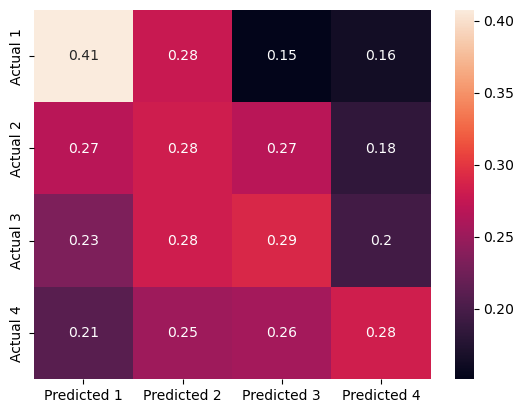

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.41      0.39      1087
           2       0.26      0.28      0.27      1100
           3       0.30      0.29      0.29      1078
           4       0.34      0.28      0.31      1078

    accuracy                           0.32      4343
   macro avg       0.32      0.32      0.31      4343
weighted avg       0.32      0.32      0.31      4343

Telcm_quartile
Accuracy:  0.33225880727607643


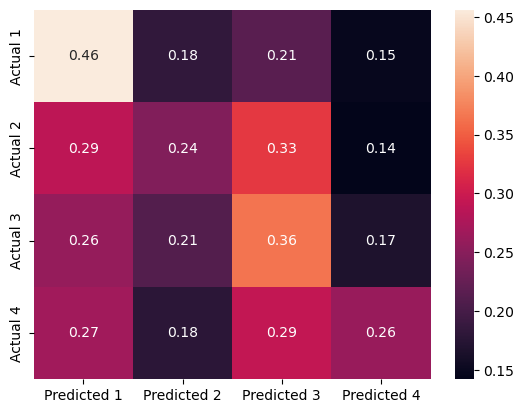

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.46      0.40      1096
           2       0.30      0.24      0.27      1078
           3       0.31      0.36      0.33      1093
           4       0.36      0.26      0.30      1076

    accuracy                           0.33      4343
   macro avg       0.33      0.33      0.33      4343
weighted avg       0.33      0.33      0.33      4343

Shops_quartile
Accuracy:  0.31314759382915036


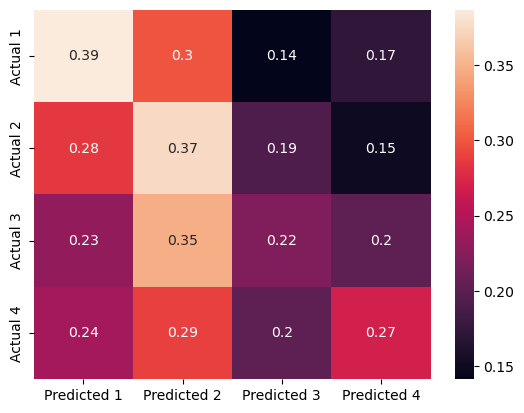

Classification Report:
              precision    recall  f1-score   support

           1       0.34      0.39      0.36      1089
           2       0.29      0.37      0.33      1097
           3       0.29      0.22      0.25      1084
           4       0.34      0.27      0.30      1073

    accuracy                           0.31      4343
   macro avg       0.31      0.31      0.31      4343
weighted avg       0.31      0.31      0.31      4343

Hlth _quartile
Accuracy:  0.3209762836748791


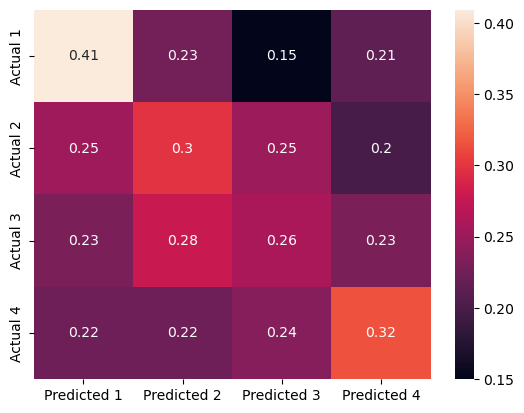

Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.41      0.39      1089
           2       0.29      0.30      0.30      1100
           3       0.29      0.26      0.27      1077
           4       0.33      0.32      0.32      1077

    accuracy                           0.32      4343
   macro avg       0.32      0.32      0.32      4343
weighted avg       0.32      0.32      0.32      4343

Utils_quartile
Accuracy:  0.3055491595671195


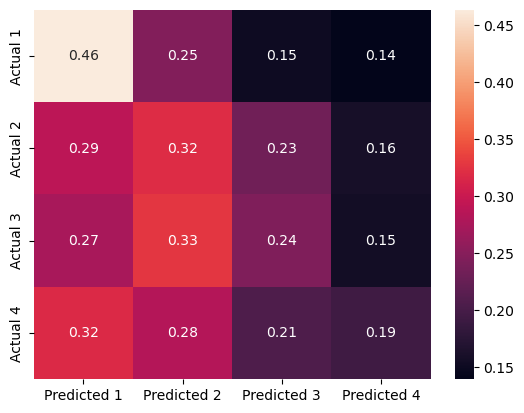

Classification Report:
              precision    recall  f1-score   support

           1       0.35      0.46      0.40      1100
           2       0.27      0.32      0.29      1083
           3       0.29      0.24      0.26      1074
           4       0.30      0.19      0.23      1086

    accuracy                           0.31      4343
   macro avg       0.30      0.30      0.30      4343
weighted avg       0.30      0.31      0.30      4343

Other_quartile
Accuracy:  0.3200552613400875


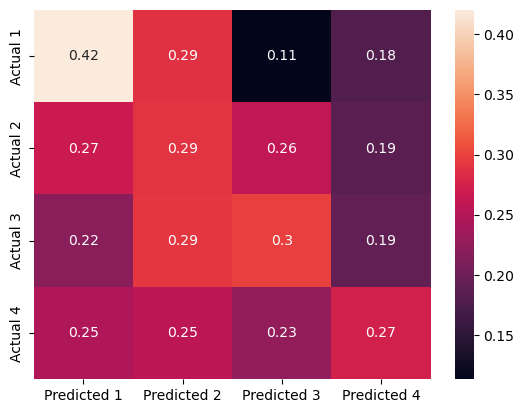

Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.42      0.39      1089
           2       0.26      0.29      0.27      1102
           3       0.33      0.30      0.31      1069
           4       0.33      0.27      0.30      1083

    accuracy                           0.32      4343
   macro avg       0.32      0.32      0.32      4343
weighted avg       0.32      0.32      0.32      4343



In [31]:
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear')


for i in Y:
    print(i)
    Y_pred_cv = cross_val_predict(logistic_regression, X, feature_target_merged_class[i], cv=5)    
    confusion_matrix = pd.crosstab(feature_target_merged_class[i], Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
    cm_np = confusion_matrix.to_numpy()
    cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
          yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
    print('Accuracy: ',metrics.accuracy_score(feature_target_merged_class[i], Y_pred_cv))
    plt.show()
    classification_rep = classification_report(feature_target_merged_class[i], Y_pred_cv)
    print(f'Classification Report:\n{classification_rep}')

## XGboost

NoDur_quartile
Accuracy:  0.2871287128712871


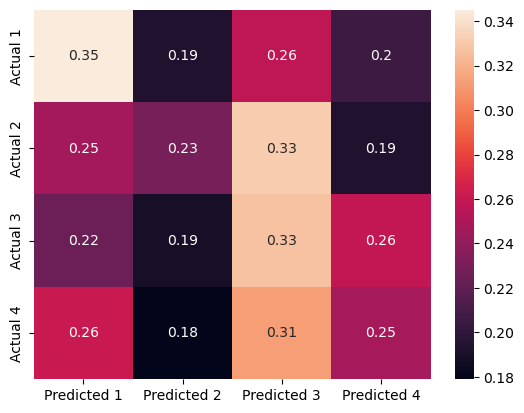

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.35      0.33      1098
           1       0.29      0.23      0.26      1103
           2       0.26      0.33      0.29      1063
           3       0.27      0.25      0.26      1079

    accuracy                           0.29      4343
   macro avg       0.29      0.29      0.29      4343
weighted avg       0.29      0.29      0.29      4343

Durbl_quartile
Accuracy:  0.27446465576790235


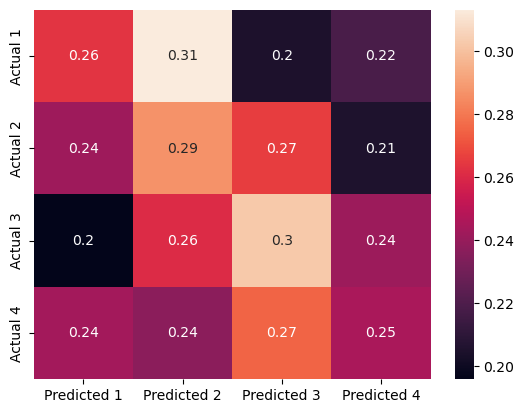

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.26      0.27      1089
           1       0.26      0.29      0.27      1091
           2       0.29      0.30      0.29      1078
           3       0.27      0.25      0.26      1085

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.27      4343
weighted avg       0.27      0.27      0.27      4343

Manuf_quartile
Accuracy:  0.2763067004374856


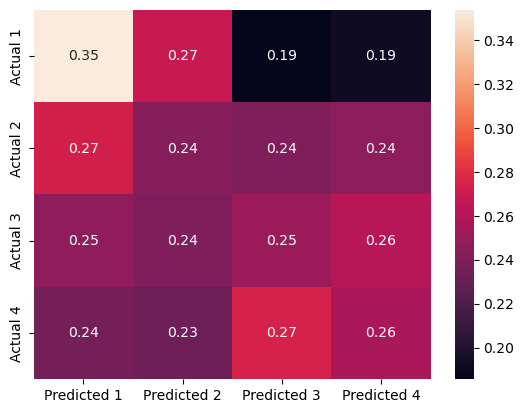

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.35      0.34      1094
           1       0.25      0.24      0.25      1092
           2       0.26      0.25      0.26      1075
           3       0.27      0.26      0.26      1082

    accuracy                           0.28      4343
   macro avg       0.27      0.28      0.28      4343
weighted avg       0.27      0.28      0.28      4343

Enrgy_quartile
Accuracy:  0.2654846880036841


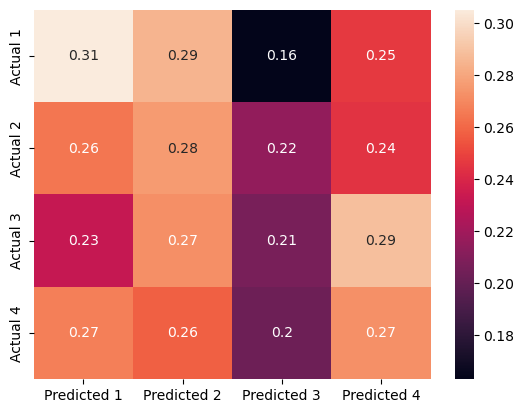

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.31      0.30      1091
           1       0.25      0.28      0.27      1093
           2       0.26      0.21      0.23      1073
           3       0.26      0.27      0.27      1086

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.26      4343
weighted avg       0.27      0.27      0.26      4343

HiTec_quartile
Accuracy:  0.26272162099930924


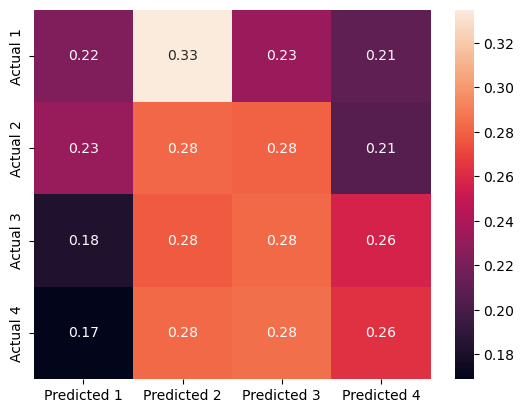

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.22      0.25      1087
           1       0.24      0.28      0.26      1100
           2       0.26      0.28      0.27      1078
           3       0.28      0.26      0.27      1078

    accuracy                           0.26      4343
   macro avg       0.26      0.26      0.26      4343
weighted avg       0.26      0.26      0.26      4343

Telcm_quartile
Accuracy:  0.2793000230255584


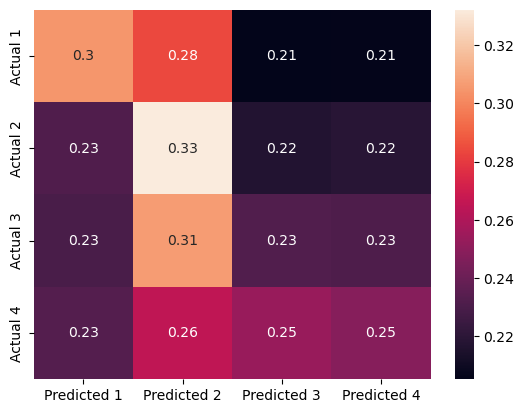

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.30      0.31      1096
           1       0.28      0.33      0.30      1078
           2       0.26      0.23      0.24      1093
           3       0.27      0.25      0.26      1076

    accuracy                           0.28      4343
   macro avg       0.28      0.28      0.28      4343
weighted avg       0.28      0.28      0.28      4343

Shops_quartile
Accuracy:  0.2654846880036841


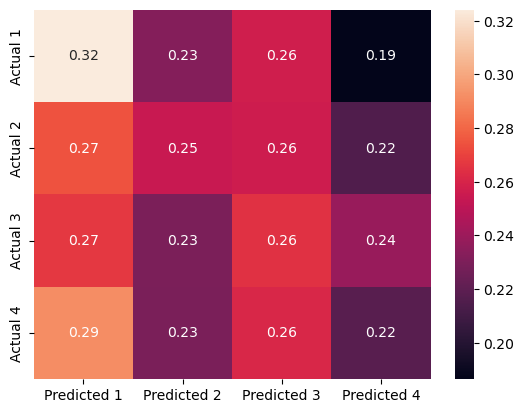

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.32      0.30      1089
           1       0.27      0.25      0.26      1097
           2       0.25      0.26      0.26      1084
           3       0.25      0.22      0.23      1073

    accuracy                           0.27      4343
   macro avg       0.26      0.27      0.26      4343
weighted avg       0.26      0.27      0.26      4343

Hlth _quartile
Accuracy:  0.2795302786092563


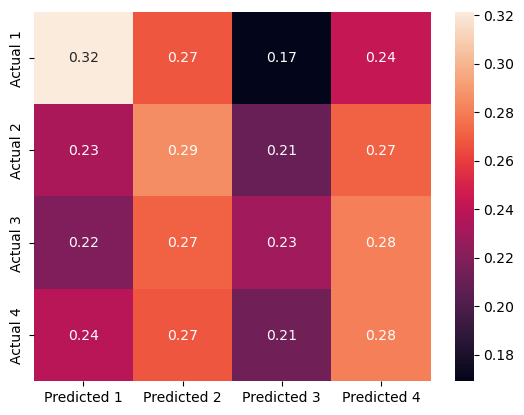

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.32      0.32      1089
           1       0.26      0.29      0.27      1100
           2       0.28      0.23      0.25      1077
           3       0.26      0.28      0.27      1077

    accuracy                           0.28      4343
   macro avg       0.28      0.28      0.28      4343
weighted avg       0.28      0.28      0.28      4343

Utils_quartile
Accuracy:  0.2601888095786323


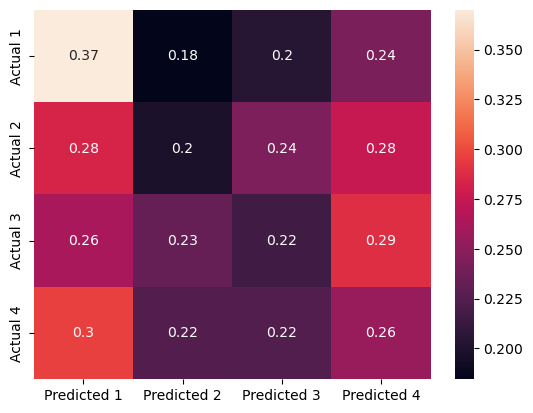

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.37      0.34      1100
           1       0.23      0.20      0.21      1083
           2       0.24      0.22      0.23      1074
           3       0.24      0.26      0.25      1086

    accuracy                           0.26      4343
   macro avg       0.26      0.26      0.26      4343
weighted avg       0.26      0.26      0.26      4343

Other_quartile
Accuracy:  0.2700897996776422


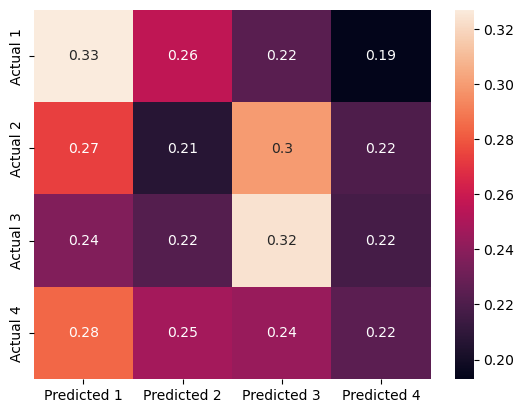

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.33      0.31      1089
           1       0.23      0.21      0.22      1102
           2       0.29      0.32      0.31      1069
           3       0.26      0.22      0.24      1083

    accuracy                           0.27      4343
   macro avg       0.27      0.27      0.27      4343
weighted avg       0.27      0.27      0.27      4343



In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in Y:
    print(i)
    feature_target_merged_class[i] = label_encoder.fit_transform(feature_target_merged_class[i])
    num_classes = len(np.unique(feature_target_merged_class[i]))
    XGboost = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes,max_depth=10,learning_rate=0.1,n_estimators=100)
    Y_pred_cv = cross_val_predict(XGboost, X, feature_target_merged_class[i], cv=5)
    confusion_matrix = pd.crosstab(feature_target_merged_class[i], Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
    cm_np = confusion_matrix.to_numpy()
    cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
          yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

    print('Accuracy: ',metrics.accuracy_score(feature_target_merged_class[i], Y_pred_cv))
    plt.show()

    classification_rep = classification_report(feature_target_merged_class[i], Y_pred_cv)
    print(f'Classification Report:\n{classification_rep}')





## Neural Network

NoDur_quartile
Accuracy:  0.3193644945889938


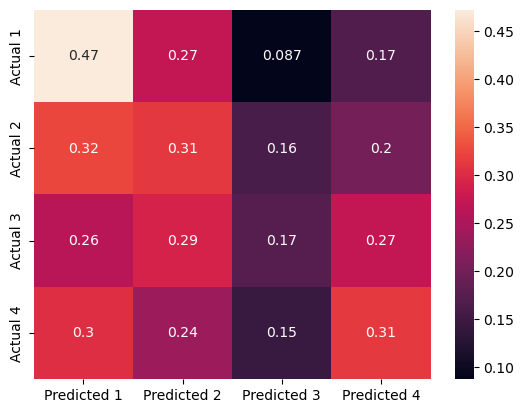

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40      1098
           1       0.29      0.31      0.30      1103
           2       0.30      0.17      0.22      1063
           3       0.33      0.31      0.32      1079

    accuracy                           0.32      4343
   macro avg       0.32      0.32      0.31      4343
weighted avg       0.32      0.32      0.31      4343

Durbl_quartile
Accuracy:  0.29725995855399495


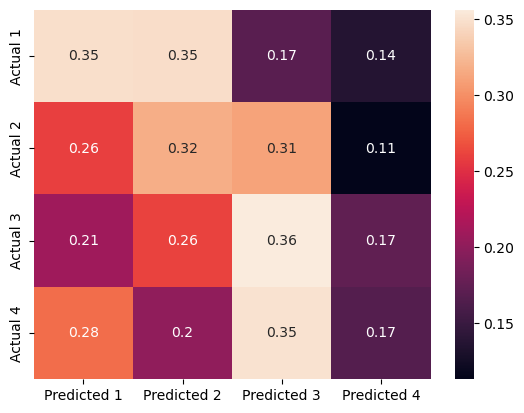

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.35      0.33      1089
           1       0.28      0.32      0.30      1091
           2       0.30      0.36      0.32      1078
           3       0.28      0.17      0.21      1085

    accuracy                           0.30      4343
   macro avg       0.30      0.30      0.29      4343
weighted avg       0.30      0.30      0.29      4343

Manuf_quartile
Accuracy:  0.30324660373014045


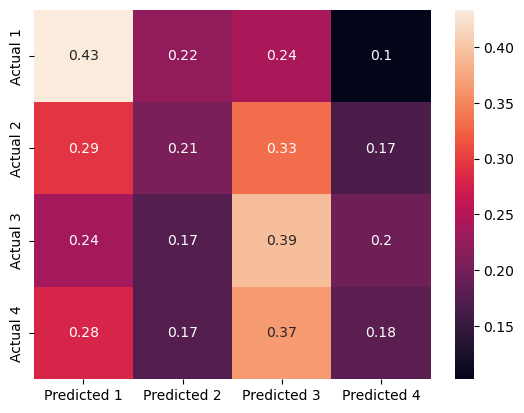

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.43      0.39      1094
           1       0.27      0.21      0.23      1092
           2       0.29      0.39      0.34      1075
           3       0.28      0.18      0.22      1082

    accuracy                           0.30      4343
   macro avg       0.30      0.30      0.29      4343
weighted avg       0.30      0.30      0.29      4343

Enrgy_quartile
Accuracy:  0.2871287128712871


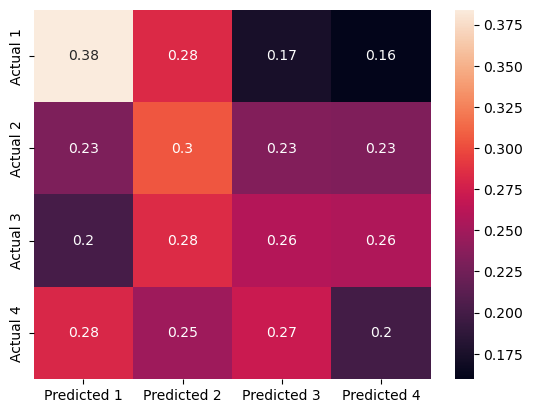

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.38      0.37      1091
           1       0.27      0.30      0.29      1093
           2       0.27      0.26      0.27      1073
           3       0.24      0.20      0.22      1086

    accuracy                           0.29      4343
   macro avg       0.28      0.29      0.28      4343
weighted avg       0.28      0.29      0.28      4343

HiTec_quartile
Accuracy:  0.2942666359659222


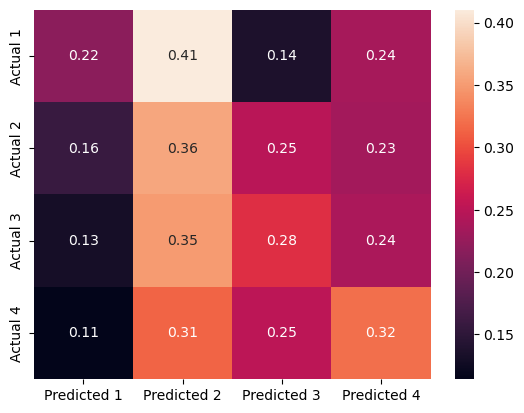

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.22      0.27      1087
           1       0.25      0.36      0.30      1100
           2       0.30      0.28      0.29      1078
           3       0.31      0.32      0.32      1078

    accuracy                           0.29      4343
   macro avg       0.30      0.29      0.29      4343
weighted avg       0.30      0.29      0.29      4343

Telcm_quartile
Accuracy:  0.31729219433571265


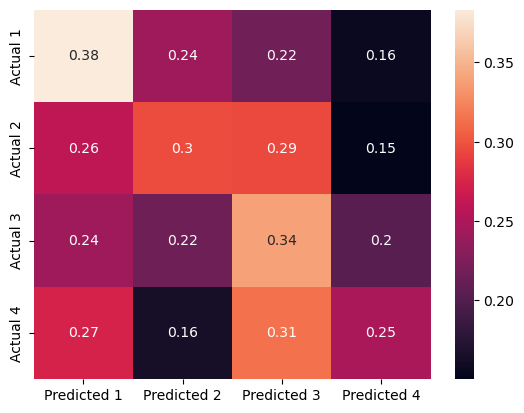

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.38      0.36      1096
           1       0.32      0.30      0.31      1078
           2       0.29      0.34      0.31      1093
           3       0.32      0.25      0.28      1076

    accuracy                           0.32      4343
   macro avg       0.32      0.32      0.32      4343
weighted avg       0.32      0.32      0.32      4343

Shops_quartile
Accuracy:  0.28897075754087037


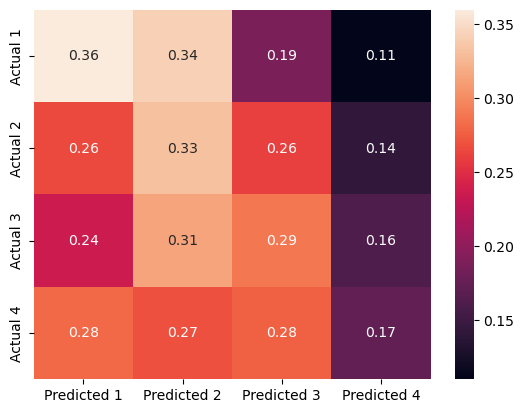

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.36      0.34      1089
           1       0.27      0.33      0.30      1097
           2       0.28      0.29      0.29      1084
           3       0.29      0.17      0.22      1073

    accuracy                           0.29      4343
   macro avg       0.29      0.29      0.28      4343
weighted avg       0.29      0.29      0.28      4343

Hlth _quartile
Accuracy:  0.3048583928160258


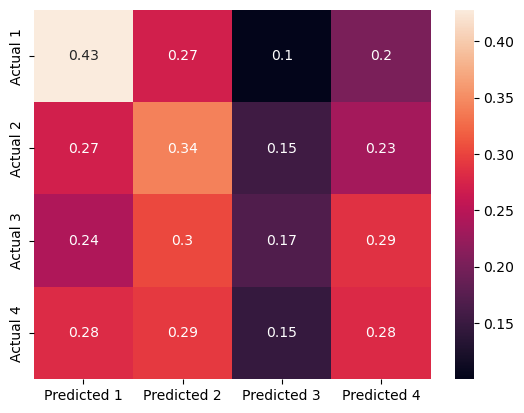

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.43      0.39      1089
           1       0.29      0.34      0.31      1100
           2       0.29      0.17      0.21      1077
           3       0.28      0.28      0.28      1077

    accuracy                           0.30      4343
   macro avg       0.30      0.30      0.30      4343
weighted avg       0.30      0.30      0.30      4343

Utils_quartile
Accuracy:  0.28022104536035


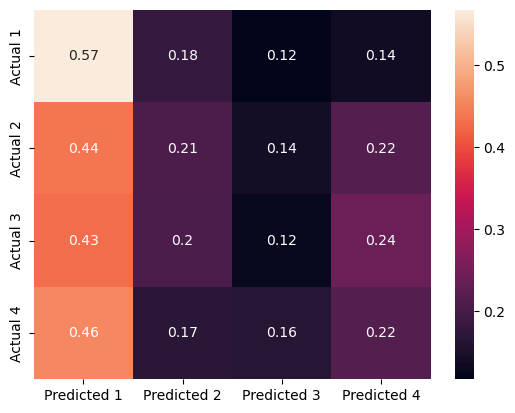

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.57      0.40      1100
           1       0.27      0.21      0.24      1083
           2       0.23      0.12      0.16      1074
           3       0.27      0.22      0.24      1086

    accuracy                           0.28      4343
   macro avg       0.27      0.28      0.26      4343
weighted avg       0.27      0.28      0.26      4343

Other_quartile
Accuracy:  0.3000230255583698


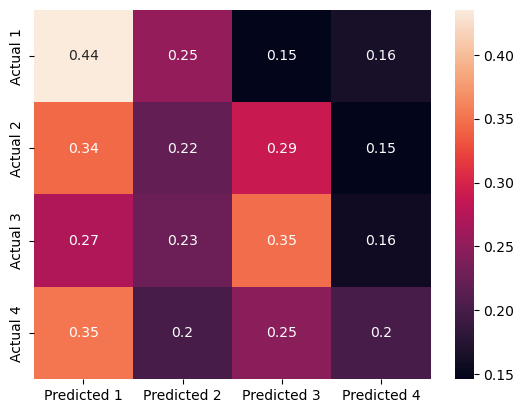

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.44      0.36      1089
           1       0.25      0.22      0.23      1102
           2       0.33      0.35      0.34      1069
           3       0.30      0.20      0.24      1083

    accuracy                           0.30      4343
   macro avg       0.30      0.30      0.29      4343
weighted avg       0.30      0.30      0.29      4343



In [34]:
X = feature_target_merged_class[['TE_std_today_norm','Average_TE_today_norm', 'TE_difference_norm', 'Average_TEstd_prior10days_norm',
                        'Average_standarized_density_norm','Average_TE_prior10days_norm']]
Y = feature_target_merged_class[['NoDur_quartile','Durbl_quartile','Manuf_quartile','Enrgy_quartile','HiTec_quartile','Telcm_quartile',
                                 'Shops_quartile','Hlth _quartile','Utils_quartile','Other_quartile']]
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')
for i in Y:
    print(i)
    Y_pred_cv = cross_val_predict(clf, X, feature_target_merged_class[i], cv=5)
    confusion_matrix = pd.crosstab(feature_target_merged_class[i], Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
    cm_np = confusion_matrix.to_numpy()
    cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
          yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
    print('Accuracy: ',metrics.accuracy_score(feature_target_merged_class[i], Y_pred_cv))
    plt.show()
    classification_rep = classification_report(feature_target_merged_class[i], Y_pred_cv)
    print(f'Classification Report:\n{classification_rep}')

# Regression

In [36]:
X = feature_target_merged_class[['TE_std_today_norm','Average_TE_today_norm', 'TE_difference_norm', 'Average_TEstd_prior10days_norm',
                                 'Average_standarized_density_norm','Average_TE_prior10days_norm']]
Y = feature_target_merged_class[['NoDur_quartile','Durbl_quartile','Manuf_quartile','Enrgy_quartile','HiTec_quartile','Telcm_quartile',
                                 'Shops_quartile','Hlth _quartile','Utils_quartile','Other_quartile']]

## SVR

In [40]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2) # C: Regularization parameter; epsilon:low:Points far from hyperplane considered in calculation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  
for i in Y:
    print(i)
    mse_scores = cross_val_score(svr, X, feature_target_merged_class[i], scoring='neg_mean_squared_error', cv=cv)
    mse_scores = cross_val_score(svr, X, feature_target_merged_class[i], scoring='neg_mean_squared_error')
    mse_scores_positive = -mse_scores
    mean_mse = np.mean(mse_scores_positive)
    print(f'Mean Cross-Validated MSE: {mean_mse}')
    print('Individual MSE Scores:', mse_scores_positive)
    Y_pred_cv = cross_val_predict(svr, X, feature_target_merged_class[i], cv=cv)
    
    df_predicted_actual = pd.DataFrame({'Predicted_Mkt-RF': Y_pred_cv, 'Actual_Mkt-RF':feature_target_merged_class[i]})
    r_squared = r2_score(df_predicted_actual['Actual_Mkt-RF'], df_predicted_actual['Predicted_Mkt-RF'])
    print(f'R-squared: {r_squared}')

NoDur_quartile
Mean Cross-Validated MSE: 1.3122330771752913
Individual MSE Scores: [1.07255264 1.48445167 1.19412982 1.11124763 1.69878363]
R-squared: 0.014786365835567361
Durbl_quartile
Mean Cross-Validated MSE: 1.3348651980863564
Individual MSE Scores: [1.01004101 1.59416359 1.16039755 0.97203916 1.93768469]
R-squared: 0.03129708223239602
Manuf_quartile
Mean Cross-Validated MSE: 1.281278048243562
Individual MSE Scores: [1.09916371 1.57002468 1.12321556 1.02136    1.5926263 ]
R-squared: 0.034141544737042895
Enrgy_quartile
Mean Cross-Validated MSE: 1.2890250083874315
Individual MSE Scores: [1.23879132 1.47227038 1.0226201  1.19490263 1.51654061]
R-squared: 0.0029261757110006226
HiTec_quartile
Mean Cross-Validated MSE: 1.305625962614838
Individual MSE Scores: [1.22157565 1.52090801 1.10085734 0.92610272 1.75868609]
R-squared: 0.03193861071366122
Telcm_quartile
Mean Cross-Validated MSE: 1.2461159174875067
Individual MSE Scores: [1.0501007  1.53984203 1.17862361 1.0473968  1.41461645]
R-s

## Neural Network Regressor

In [41]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for i in Y: 
    mse_scores = cross_val_score(nn, X, feature_target_merged_class[i], scoring='neg_mean_squared_error', cv=cv)
    mse_scores_positive = -mse_scores
    mean_mse = np.mean(mse_scores_positive)
    print(f'Mean Cross-Validated MSE: {mean_mse}')
    print('Individual MSE Scores:', mse_scores_positive)
    Y_pred_cv = cross_val_predict(nn, X, feature_target_merged_class[i], cv=cv)
    
    df_predicted_actual = pd.DataFrame({'Predicted_Mkt-RF': Y_pred_cv, 'Actual_Mkt-RF':feature_target_merged_class[i]})
    r_squared = r2_score(df_predicted_actual['Actual_Mkt-RF'], df_predicted_actual['Predicted_Mkt-RF'])
    print(f'R-squared: {r_squared}')

Mean Cross-Validated MSE: 1.20070306086761
Individual MSE Scores: [1.16426053 1.2390595  1.23576057 1.19020499 1.17422971]
R-squared: 0.04127770087051352
Mean Cross-Validated MSE: 1.1941327403455908
Individual MSE Scores: [1.18816494 1.16310159 1.24128007 1.20425304 1.17386406]
R-squared: 0.04556466936550496
Mean Cross-Validated MSE: 1.1787493970691325
Individual MSE Scores: [1.22663703 1.21167498 1.14596344 1.18270174 1.1267698 ]
R-squared: 0.05852440945506654
Mean Cross-Validated MSE: 1.2245685359714242
Individual MSE Scores: [1.17126047 1.25742592 1.19885584 1.23188239 1.26341806]
R-squared: 0.022321994564754588
Mean Cross-Validated MSE: 1.1774982804412821
Individual MSE Scores: [1.20052868 1.24935779 1.19220586 1.14378922 1.10160985]
R-squared: 0.0556958606689264
Mean Cross-Validated MSE: 1.19976762247045
Individual MSE Scores: [1.19877096 1.2134523  1.21791593 1.17487739 1.19382153]
R-squared: 0.0403363901254562
Mean Cross-Validated MSE: 1.1921198710527743
Individual MSE Scores: [